## Keras: A high level neural network library

In this exercise we will revisit classification using simple neural networks. To do so we will use Keras, a popular neural network package. Keras is a high level library that allows rapid prototyping of neural networks due to its precompiled layers, just as Scikit-learn contains a number of prebuilt classifiers.


## Keras

Detailed instructions can be found at https://keras.io.


To start the demo, we have a 2D dataset so we can visualize what the network is doing.

Neural networks are so popular now due to their ability to quickly learn nonlinear boundaries. So, we have an example that would be impossible for a linear classifier and demonstrate how a neural network can be used to solve this. As you can see, in the dataset below there is no straight line that you can draw that perfectly separates the red and blue classes

In [ ]:
from google.colab import files
src = list(files.upload().values())[0]
open('utilss.py','wb').write(src)
#import utils

Saving utils.py to utils.py


2747

In [ ]:
import utilss

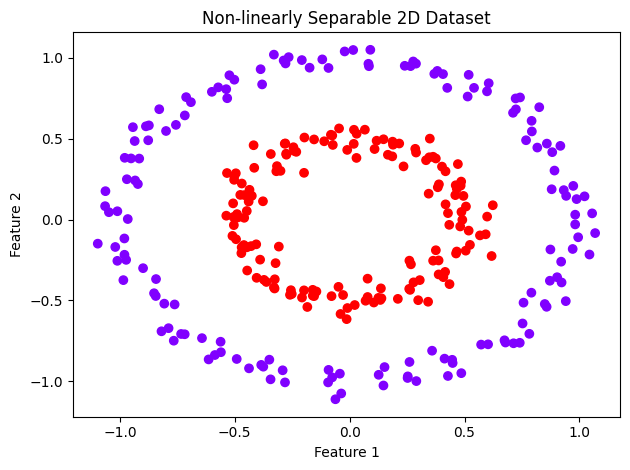

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
import numpy as np

# Generate a non-linearly separable dataset
X, y = make_circles(n_samples=300, factor=0.5, noise=0.05, random_state=42)

# Function to get consistent colors for plotting
def get_colors(y):
    # Map unique labels to colors
    unique_labels = np.unique(y)
    colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))
    color_map = {label: color for label, color in zip(unique_labels, colors)}
    return [color_map[label] for label in y]

cmap = get_colors(y)

# Plotting
plt.scatter(X[:, 0], X[:, 1], c=cmap)
plt.title("Non-linearly Separable 2D Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.tight_layout()
plt.show()

Let's split it into a training and testing set

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=10)

We will build a Perceptron using Keras as an example-- Recall that a perceptron is a 0 hidden layer neural network with a single output unit. In Keras terms, it's a single Dense layer with 1 unit.

We will build this perceptron with a sigmoidal output (so it outputs a probability of class 1) and the binary_crossentropy loss function (which corresponds to sigmoid).

In [ ]:
# Relevant imports
from tensorflow.keras.models import Sequential
# Keras refers to an architecture in which the outputs of
# one layer are the inputs to the next as "Sequential"
from tensorflow.keras.layers import Dense
# Everything we've talked about in class so far is referred to in
# Keras as a "dense" connection between layers, where every input
# unit connects to a unit in the next layer
from tensorflow.keras.optimizers.legacy import SGD
# SGD is the learning algorithm we will use

# Exercise 1:

Q1. Let's first create neural network with 1 layer

To add a layer to the architecture, you would simply use .add(LAYER).

Each "input_dim" of each layer should be the number units in the previous layer (in this case the input), and the number of "units" should be the number of outputs of the layer (in this case it will be 1).

In [ ]:
### YOUR CODE HERE ###
perceptron = Sequential()
perceptron.add(Dense(units=1,input_dim=2,activation='sigmoid'))


Now we specify how to optimize the neural network. We mentioned gradient descent and stochastic gradient descent in class. Let's use the latter here and compile the model. We also specify the loss function as "binary_crossentropy".

In [ ]:
sgd = SGD(learning_rate=0.01, decay=1e-7, momentum=.9)  # Stochastic gradient descent
perceptron.compile(loss="binary_crossentropy", optimizer=sgd)


Q2. Now we train the built perceptron with appropriate epochs and batch_size.

In [ ]:
### YOUR CODE HERE ###
perceptron.fit(X_train,y_train,epochs=200,batch_size=32)

Epoch 1/200
8/8 [==============================] - 0s 3ms/step - loss: 0.7212
Epoch 2/200
8/8 [==============================] - 0s 1ms/step - loss: 0.7194
Epoch 3/200
8/8 [==============================] - 0s 1ms/step - loss: 0.7167
Epoch 4/200
8/8 [==============================] - 0s 1ms/step - loss: 0.7141
Epoch 5/200
8/8 [==============================] - 0s 1ms/step - loss: 0.7120
Epoch 6/200
8/8 [==============================] - 0s 2ms/step - loss: 0.7094
Epoch 7/200
8/8 [==============================] - 0s 2ms/step - loss: 0.7074
Epoch 8/200
8/8 [==============================] - 0s 1ms/step - loss: 0.7051
Epoch 9/200
8/8 [==============================] - 0s 1ms/step - loss: 0.7037
Epoch 10/200
8/8 [==============================] - 0s 2ms/step - loss: 0.7022
Epoch 11/200
8/8 [==============================] - 0s 1ms/step - loss: 0.7008
Epoch 12/200
8/8 [==============================] - 0s 1ms/step - loss: 0.7000
Epoch 13/200
8/8 [==============================] - 0s 2ms/st

Q3. Compute accuracy by implementing your own function.

In [ ]:
y_preds = perceptron.predict(X_test)

2/2 [==============================] - 0s 4ms/step


In [ ]:
### Build your own function to calculate accuracy###
def accuracy(y, y_preds):
    y_pred_classes = (y_preds > 0.5).astype("int32")
    accuracy = np.mean(y == y_pred_classes)
    return accuracy

In [ ]:
print(f'The accuracy is: {accuracy(y_test, y_preds)}')

The accuracy is: 0.5


57/57 [==============================] - 0s 802us/step


Text(22.347222222222214, 0.5, 'Test')

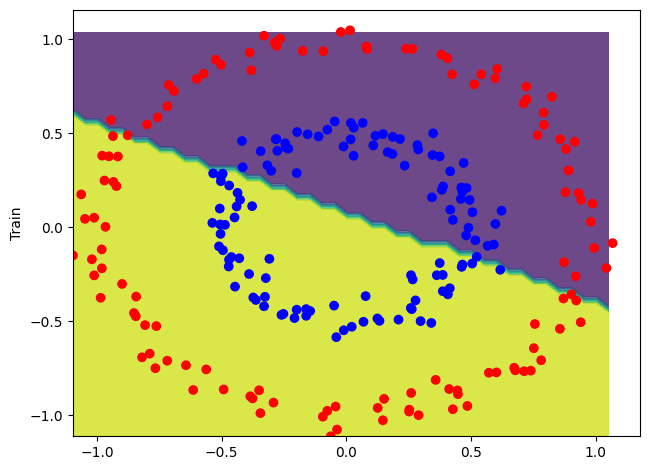

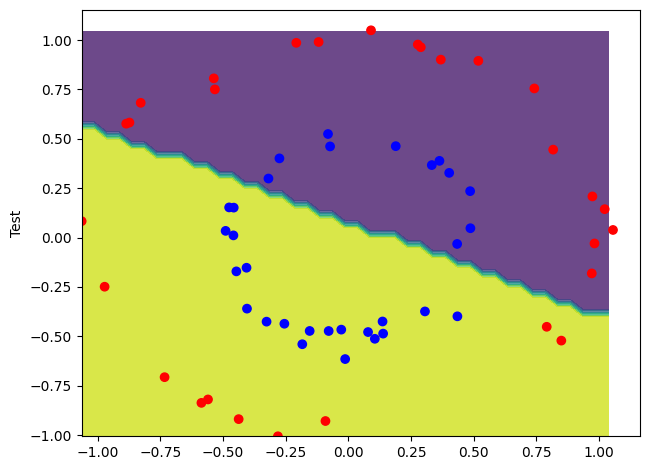

In [ ]:
from utilss import visualize_2d_classification
f, ax = visualize_2d_classification(perceptron, X_train, y_train)
ax.set_ylabel("Train")
f, ax = visualize_2d_classification(perceptron, X_test, y_test)
ax.set_ylabel("Test")

Recall that a perceptron is nothing more than a linear classifier, which is trying to separate our data using a line. It turns out that the introduction of hidden layers allows us to draw "lines" in higher dimensions, which, when mapped back into our original 2d space,  may look nonlinear.

# Exercise 2:

For this exercise, use Keras to create a 2-layer neural network by completing build_one_output_model(). We will then add one hidden layer of 2 units and an output layer of 1 unit (corresponding to our classes- sometimes referred to as a "readout" layer).

The model has already been initialized and the optimizer and loss function have been defined for you.

For your intermediate layers, use "relu" as the activation function, and "sigmoid" (as the demo above) for your output layer.

In [ ]:
# Keras uses the Sequential model for linear stacking of layers.
# That is, creating a neural network is as easy as (later)
# defining the layers!
from keras.models import Sequential
# Everything we've talked about in class so far is referred to in
# Keras as a "dense" connection between layers, where every input
# unit connects to a unit in the next layer

from keras.layers import Dense
# SGD is the learning algorithm we will use
from tensorflow.keras.optimizers.legacy import SGD
from keras.layers import Dense, Dropout
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

Q1. Create a 2 layer neural network by completing build_one_output_model().

In [ ]:
def build_one_output_model():
    model = Sequential()

    ### YOUR CODE HERE ###
    # Add a input hidden layer with 2 units
    model.add(Dense(units=2,input_dim=2,activation='relu'))

    # Add a final output layer with 1 unit

    model.add(Dense(units=1,activation='sigmoid'))

    # Specify SGD optimizer with appropriate values in learning_rate, decay and momentum.
    sgd = SGD(learning_rate=0.02,decay=2e-7,momentum=0.95)

    # compile the model with "binary_crossentropy" loss and SGD optimizer.

    model.compile(loss='binary_crossentropy',optimizer=sgd)
    return model


In [ ]:
model1 = build_one_output_model()

Q2. Fit your model by training set with appropriate epochs and batch_size.

In [ ]:
### YOUR CODE HERE ###
model1.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6884
Epoch 2/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6835
Epoch 3/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6778
Epoch 4/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6700
Epoch 5/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6637
Epoch 6/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6575
Epoch 7/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6534
Epoch 8/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6486
Epoch 9/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6447
Epoch 10/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6412
Epoch 11/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6375
Epoch 12/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6340
Epoch 13/100
8/8 [==============================] - 0s 2ms/st

Q3. Compute accuracy by using your own function.

In [ ]:
### YOUR CODE HERE ###
y_pred_nn = model1.predict(X_test)
accuracy_nn = accuracy(y_test,y_pred_nn)
print(accuracy_nn)

2/2 [==============================] - 0s 3ms/step
0.5066666666666667


57/57 [==============================] - 0s 1ms/step


Text(22.347222222222214, 0.5, 'Test')

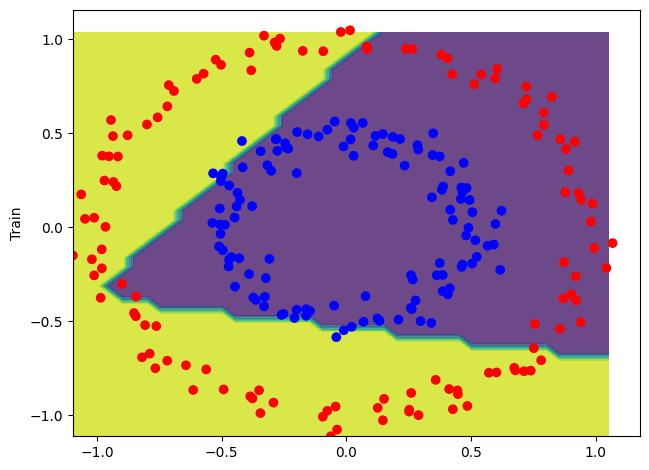

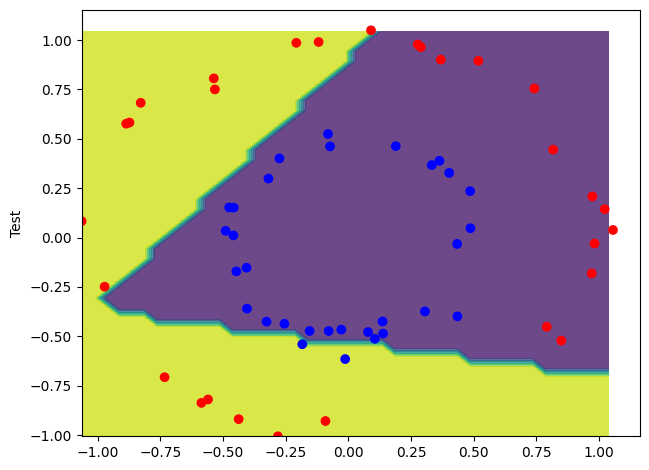

In [ ]:
# And visualize how your model did
f, ax = visualize_2d_classification(model1, X_train, y_train)
ax.set_ylabel("Train")
f, ax = visualize_2d_classification(model1, X_test, y_test)
ax.set_ylabel("Test")


It is actually quite rare for a classification neural network to have a single output unit as we've implemented above. Usually we have a $k$ unit output layer, where $k$ is the number of classes. This is typically done because when combined with the "softmax" activation function , the activity of each unit corresponds with the probability of that class. This allows us to easily extend to multiclass classification.

Now we will still work with two units, but map them to two output units rather than 1. class 0 will be [1, 0], and class 1 will be [0, 1]. This operation is referred to as "one hot encoding".

In [ ]:
# Before we can fit the network, we need to one-hot vectorize our response.
# There is a keras method for that.
from tensorflow.keras.utils import to_categorical

y_train_vectorized = to_categorical(y_train)
y_test_vectorized = to_categorical(y_test)

In [ ]:
print("Label | One-hot")
for i in range(10):
    print("{} | {}".format(y_train[i], y_train_vectorized[i]))

Label | One-hot
0 | [1. 0.]
0 | [1. 0.]
1 | [0. 1.]
1 | [0. 1.]
0 | [1. 0.]
0 | [1. 0.]
0 | [1. 0.]
0 | [1. 0.]
1 | [0. 1.]
1 | [0. 1.]


The one hot encoded vectors will serve as future labels for our models.

# Exercise 3:

Q1.Implement build_classification_model() that returns a sequential model that takes an input of size 2, passes it to a hidden layer of size 10, then a hidden layer of size 5, then a readout layer of size 2.


As before, use the "relu" activation function for hidden layers, but since we have multiple output units, use the "softmax" activation for the final layer.

We use SGD optimizer and "categorical_crossentropy" loss function to compile the model.

In [ ]:
def build_classification_model():
    model = Sequential()

    ### YOUR CODE HERE ###
    model.add(Dense(units=10,input_dim=2,activation='relu'))
    model.add(Dense(units=5,activation='relu'))
    model.add(Dense(units=2,activation='softmax'))
    sgd = SGD(learning_rate=0.01,decay=2e-7,momentum=0.95)
    model.compile(loss='categorical_crossentropy',optimizer=sgd)
    return model

In [ ]:
modell = build_classification_model()

Q2. Fit your model by training set

In [ ]:
### YOUR CODE HERE ###
modell.fit(X_train, y_train_vectorized, epochs=100, batch_size=32)

Epoch 1/100
8/8 [==============================] - 0s 2ms/step - loss: 0.7096
Epoch 2/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7046
Epoch 3/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6893
Epoch 4/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6779
Epoch 5/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6672
Epoch 6/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6564
Epoch 7/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6449
Epoch 8/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6330
Epoch 9/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6209
Epoch 10/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6069
Epoch 11/100
8/8 [==============================] - 0s 1ms/step - loss: 0.5910
Epoch 12/100
8/8 [==============================] - 0s 1ms/step - loss: 0.5719
Epoch 13/100
8/8 [==============================] - 0s 1ms/st

Q3. Compute accuracy by using your own function

In [ ]:
y_pred_ann = modell.predict(X_test)
#print(y_pred_ann)
accuracy_ann = accuracy(y_test_vectorized,y_pred_ann)
print(accuracy_ann)

2/2 [==============================] - 0s 3ms/step
1.0


57/57 [==============================] - 0s 889us/step


Text(22.347222222222214, 0.5, 'Test')

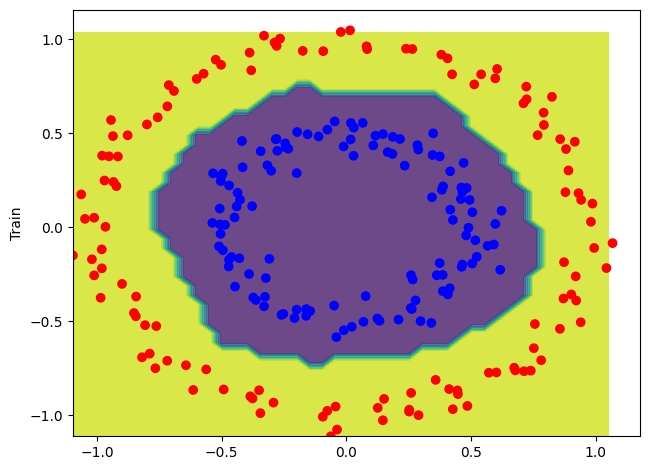

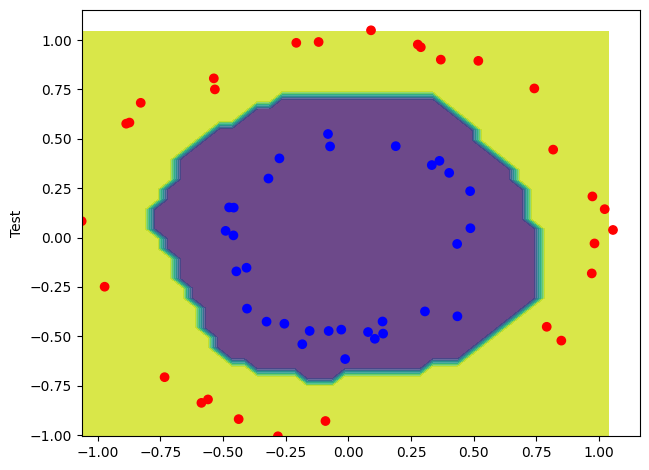

In [ ]:
# And visualize how your model did
from utilss import visualize_2d_classification
f, ax = visualize_2d_classification(modell, X_train, y_train)
ax.set_ylabel("Train")
f, ax = visualize_2d_classification(modell, X_test, y_test)
ax.set_ylabel("Test")

# Exercise 4:
### Short answer-questions
\lb remove this

Q1. The learning rate is an important parameter for gradient descent. Please briefly describe a possible issue if we choose too high a learning rate for full batch gradient descent (GD). Also, please briefly describe a possible issue if we choose too high a learning
rate for stochastic gradient descent (SGD), but is not a problem in the full batch setting.

Ans - In full batch gradient descent, using a too high learning rate can lead to overshooting the minimum of the loss function. It arises because the algorithm takes excessively large steps towards the optimum, based on the gradient calculated from the entire dataset. Consequently, the model might oscillate around or converge quickly towards a suboptimal solution, preventing effective minimization of the loss.

In stochastic gradient descent, a high learning rate can cause severe problems due to its noisy and less stable nature. Since SGD relies on gradients from a small batch of data, a high learning rate amplifies the erratic changes in model parameters. It can lead to significant divergence, as the model responds too aggressively to the noisy gradient updates, a problem less prevalent in full batch gradient descent due to its more consistent and stable gradient calculations.

Q2. Please give an example in the data augmentation methods that is helpful for classifying images of dogs and cats, but not for classifying handwritten digit.

Ans- We can increase training set by flipping the image to help our algorithm to classify dog/cat, while it does not necessarily help in the situation of classifying digits since flipped digits means nothing in most cases. It might change our answer too (6 becomes 9 after flipping)

Q3. Suppose we have the following two neural networks containing fully-connected layers only.
<div>
<img src="https://ucla.box.com/shared/static/kgninjcbqpztz680q47emsluvituw4ga.jpg" width="300"/>
</div>
Please give one advantage of A over B, and one advantage of B over A.

Ans - An advantage of Network A over B is that Network A has a simpler architecture with two layers of 100 units each, which means it has fewer parameters to train compared to Network B. The uniformity can lead to more efficient computation during both training and inference. It can also result in a shorter training time and lower computational cost.

An advantage of Network B over A is that Network B's architecture that involves a hidden layer of 10 units. A is simply a regression model since it does not have any hidden layers, and hence it cant learn any non linear patterns. With B, we can capture much more complex relationships.

# Exercise 5:

Now let's revisit the classification problem (Dataset 1) in Homework 2. Build a neural network to predict the output in the default payment dataset. The architecture choice is up to you, but you are required to use Dense layers and dropout layers only.

"CreditDefault_training.csv" has 3985 records.

"CreditDefault_Xtest.csv" contains contains 1000 rows and 14 columns. This is the test set which only contains the features.

Q1. Read the data<br/>
- Apply standardization to continuous values<br/>
- Convert categorical variables and the target "default.payment.next.month" into one-hot encodings. <br>
- Split data into train and validation set<br/>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
uploaded = files.upload()

Saving CreditDefault_training.csv to CreditDefault_training.csv
Saving CreditDefault_Xtest.csv to CreditDefault_Xtest.csv


In [ ]:
### YOUR CODE HERE ###
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
enc= OneHotEncoder(sparse=False)
enc_target = OneHotEncoder(sparse=False)
X = pd.read_csv('CreditDefault_training.csv')
y = X['default.payment.next.month'].copy()
X = X.loc[:, X.columns!='default.payment.next.month']

test = pd.read_csv('CreditDefault_Xtest.csv')

In [ ]:
test

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,80000,1,6,1,41,0,0,0,0,0,...,133017,19164,3272,11766,4351,3520,1000,3272,11766,1740
1,50000,1,1,2,35,0,0,0,0,0,...,18188,18397,18161,18383,1565,7240,795,1000,673,647
2,80000,2,1,1,42,2,2,2,2,2,...,20471,20638,21003,20529,1600,1700,800,1000,0,2000
3,160000,2,2,2,27,0,0,0,0,0,...,80240,39835,41150,0,3600,3700,1700,2000,0,0
4,30000,1,1,1,30,0,0,0,0,0,...,14634,16378,16961,19669,3000,2000,2000,1000,3000,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,360000,2,1,2,29,-1,-1,-1,0,0,...,9118,19183,36842,10621,3050,9118,11000,30000,428,3166
996,20000,1,3,1,39,-1,2,2,2,-1,...,390,0,780,0,390,0,0,780,0,0
997,360000,1,3,2,33,-2,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
998,50000,1,3,1,51,0,0,0,0,0,...,64104,33406,34104,34869,3000,2500,1985,1163,1256,1316


In [ ]:
col_categorical = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
numeric_data = X.drop(columns=col_categorical)
X_numeric = pd.DataFrame(scaler.fit_transform(numeric_data),columns=numeric_data.columns)
test_x_numeric = pd.DataFrame(scaler.transform(test.drop(columns=col_categorical)),columns=numeric_data.columns)
x_categorical = pd.DataFrame(enc.fit_transform(X[col_categorical]),columns=enc.get_feature_names_out(col_categorical))
test_x_categorical = pd.DataFrame(enc.transform(test[col_categorical]),columns=enc.get_feature_names_out(col_categorical))
X_full = pd.concat([X_numeric,x_categorical],axis=1)
test_full = pd.concat([test_x_numeric,test_x_categorical],axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
X_full

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_7,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7
0,-0.902690,-1.237370,-0.659401,-0.657623,-0.653395,-0.558590,-0.564919,-0.630095,-0.264370,-0.244519,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.751263,-1.237370,0.123571,0.174192,0.222944,0.299113,0.397532,0.500862,-0.175510,-0.171175,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.898720,0.816144,-0.573530,-0.484216,-0.572498,-0.613365,-0.597173,-0.540866,0.526037,0.097548,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.054118,1.896941,-0.680080,-0.679090,-0.618263,-0.598931,-0.584702,-0.635727,-0.362190,-0.116218,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.902690,1.464622,-0.427412,-0.411319,-0.357541,-0.331676,-0.296197,-0.272334,-0.299963,-0.154688,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3980,2.504431,0.491905,2.154786,2.249624,2.419276,2.557744,1.846357,1.751360,0.260328,0.189638,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3981,1.671579,-0.805051,-0.661388,-0.661528,-0.645646,-0.622610,-0.625645,-0.582393,-0.281669,-0.215705,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3982,-0.372694,-0.696972,0.687235,0.648951,0.720830,0.847630,0.961260,1.054152,-0.362190,-0.094133,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3983,-0.675549,0.708064,-0.079045,-0.041863,-0.006120,0.056998,0.127373,0.168754,-0.237736,-0.222536,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Split data into X (features) and y (target)
# Please make sure y is in a one-hot representation
# WRITE CODE HERE
y_vectorized= enc_target.fit_transform(y.values.reshape(-1,1))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# Split data into training and validation set (the code has been provided)
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_full, y_vectorized, test_size=0.3, random_state=42)

In [ ]:
# Print out the shape of X_train
X_train.shape

(2789, 82)

Q2. Build a neural network to predict the output in the "CreditDefault_training.csv". The architecture choice is up to you, but you are required to use Dense layers and dropout layers only.

You can try different number of layers, different number of units in layers and experiment with hyperparameters.

To include regularization, you can include a dropout layer after a hidden layer. In dropout layer, you can randomly set a fraction rate of input units to 0 at each update during training time, which helps prevent overfitting.

Please use 'relu' activation function for all intermediate layers.

Please build your model in the build_final_model() function

In [ ]:
import keras
def build_final_model():
    model = Sequential()
    ### YOUR CODE HERE ###

    # First add fully-connected (Dense) hidden layers with appropriate input dimension
    model.add(Dense(units=16,input_dim=X_train.shape[1],activation='relu'))
    model.add(Dropout(rate=0.2))
    model.add(Dense(units=6,activation='relu'))
    model.add(Dropout(rate=0.2))


    model.add(Dense(units=6,activation='relu'))
    model.add(Dropout(rate=0.1))
    model.add(Dense(units=3,activation='relu'))

    model.add(Dense(units=y_vectorized.shape[1],activation='softmax'))

    # Drop out layer


    # Continues the process


    # Finally, add a readout layer

    ######################
    sgd = SGD(learning_rate=0.03, decay=1e-7, momentum=.9)  # Stochastic gradient descent
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])


    return model

In [ ]:
model_nn = build_final_model()

Q3. Fit the model by training set with epochs=100, batch_size=32

In [ ]:
### YOUR CODE HERE ###
model_nn.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
88/88 [==============================] - 1s 2ms/step - loss: 0.5564 - accuracy: 0.7565
Epoch 2/100
88/88 [==============================] - 0s 2ms/step - loss: 0.5287 - accuracy: 0.7666
Epoch 3/100
88/88 [==============================] - 0s 2ms/step - loss: 0.4951 - accuracy: 0.7759
Epoch 4/100
88/88 [==============================] - 0s 2ms/step - loss: 0.4720 - accuracy: 0.8010
Epoch 5/100
88/88 [==============================] - 0s 2ms/step - loss: 0.4703 - accuracy: 0.7881
Epoch 6/100
88/88 [==============================] - 0s 2ms/step - loss: 0.4595 - accuracy: 0.7978
Epoch 7/100
88/88 [==============================] - 0s 2ms/step - loss: 0.4559 - accuracy: 0.8032
Epoch 8/100
88/88 [==============================] - 0s 2ms/step - loss: 0.4525 - accuracy: 0.8006
Epoch 9/100
88/88 [==============================] - 0s 1ms/step - loss: 0.4500 - accuracy: 0.7999
Epoch 10/100
88/88 [==============================] - 0s 1ms/step - loss: 0.4561 - accuracy: 0.8006
Epoch 11/

Q4. Obtain predictions on validation set and print accuracy, precision & recall and F1 score.

F1 = 2 * (precision * recall) / (precision + recall)

In [ ]:
y_pred_train = model_nn.predict(X_train)
#y_pred_val =  [[int(j>=0.5) for j in i] for i in y_pred_val]
#y_pred_train = [int(i[1]>=0.5) for i in y_pred_train]
accuracy_train = accuracy(y_train,y_pred_train)
print(accuracy_train)

88/88 [==============================] - 0s 884us/step
0.842954463965579


In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score,classification_report,f1_score
y_pred_val = model_nn.predict(X_val)
y_pred_val = (y_pred_val > 0.5).astype("int32")
#y_pred_val =  [[int(j>=0.5) for j in i] for i in y_pred_val]
#y_pred_val = [int(i[1]>=0.5) for i in y_pred_val]
# y_pred_labels = [item for sublist in enc_target.inverse_transform(y_pred_val) for item in sublist]

# y_val_labels = [item for sublist in enc_target.inverse_transform(y_val) for item in sublist]
#print(y_val_labels)
#print(y_pred_labels)
precision_val = precision_score(y_val,y_pred_val, average= None)
print(f"Validation Precision = {precision_val[1]}")
recall_val = recall_score(y_val,y_pred_val, average= None)
print(f"Validation Recall = {recall_val[1]}")
accuracy_val = accuracy(y_val,y_pred_val)
print(f"Validation Accuracy = {accuracy_val}")
print(f"Validation F1 = {f1_score(y_val,y_pred_val,average=None)[1]}")

38/38 [==============================] - 0s 996us/step
Validation Precision = 0.5330882352941176
Validation Recall = 0.5370370370370371
Validation Accuracy = 0.7892976588628763
Validation F1 = 0.5350553505535055


In [ ]:
print(classification_report(y_val,y_pred_val))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       926
           1       0.53      0.54      0.54       270

   micro avg       0.79      0.79      0.79      1196
   macro avg       0.70      0.70      0.70      1196
weighted avg       0.79      0.79      0.79      1196
 samples avg       0.79      0.79      0.79      1196



Q5. Plot the ROC curve by giving appropriate names for title and axes.

38/38 [==============================] - 0s 993us/step


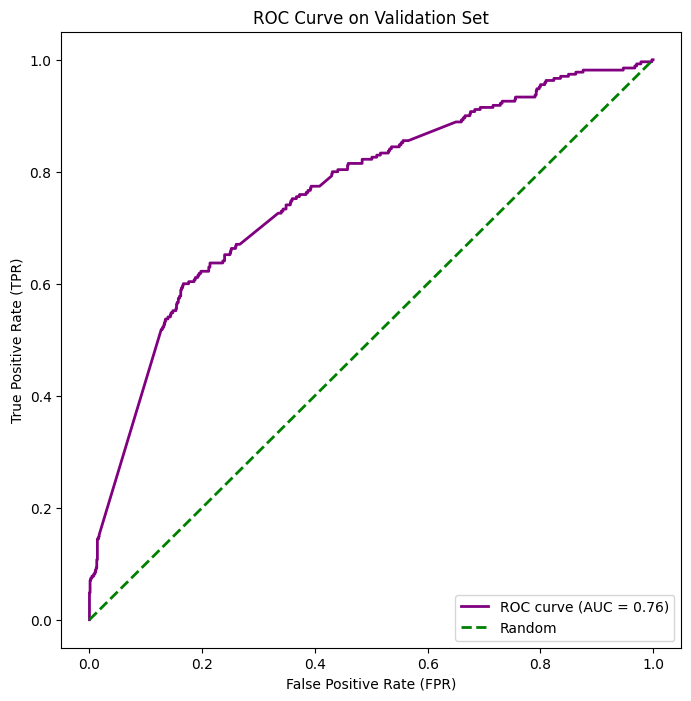

In [ ]:
# Plot the ROC curve by giving appropriate names for title and axes.
### WRITE CODE HERE
from sklearn.metrics import roc_curve,auc
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

y_val_prob = model_nn.predict(X_val)[:, 1]
fpr, tpr,_ = roc_curve(y_val[:,1], y_val_prob)
roc_auc = auc(fpr,tpr)

plt.figure(figsize = (8, 8))
plt.plot(fpr, tpr, color = 'purple', lw = 2, label = 'ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color = 'green', lw = 2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve on Validation Set')
plt.legend(loc='lower right')
plt.show()

Is the accuracy value impressive for this dataset? Please explain based on the structure of this dataset.

For these five metrics (accuracy, precision, recall, F1 score and AUC), please explain their connections and differences. For our dataset, which metrics should we focus more on?

Ans- The accuracy value is not that impressive for this data due to its imbalance in class labels. Even if we had a model that always predicted 0, we would have gotten a high accuracy number!

**Connections and Differences:**
* Accuracy vs. Precision and Recall:

Accuracy provides an overall measure of correctness, while precision and recall focus on the performance of the model on positive instances.

* Precision and Recall Trade-off:

Precision and recall are often in tension; improving one may degrade the other. The F1 score combines them to strike a balance. Precision is how precise we are with our positive predictions, and recall is the number of positive examples we are able to correctly classify.

* AUC vs. Other Metrics:

AUC (Area Under Curve of TPR vs FPR for various thresholds) is not affected by class imbalance and provides a summary measure of a model's performance across various decision thresholds. Other metrics are specific to a particular threshold.



**In this Example:**

 we would focus more on AUC and Recall, since the cost of false negatives is higher than false positives.

What we want to do when creating a model for predicting the probability of a client defaulting on the payment of a loan is maximize the Recall. This is because Banks tend to be more conservative and the cost associated when classifying clients as no default given that they default, is high (False Negatives are costly). On the other hand, it is a trade-off with precision as well because if precision is low, the bank is missing opportunities for getting new healty clients.

A good indicator to use is the ROC curve and therefore the AUC because it measures the overall performance of predicting default. We need to maximize the true positive rate while minimizing the false positive.

#### Tuning hyperparameters using cross-validation:<br/>
Cross-validation in neural networks is computationally expensive. So we will perform a randomized cross-validation search across the parameter space using RandomizedSearchCV function.

Here, we will use KerasClassifier class, which act as a wrapper of scikit-learn’s library in Keras comes as a handy tool for automating the tuning process.

In [ ]:
!pip install scikeras

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scikeras.wrappers import KerasClassifier

Q6. First we create a function to build neural network model with activation function and learning rate of SGD as parameters

In [ ]:
# Build create_model function with activation function and learning rate of SGD as parameters
from tensorflow import keras
def create_model(learning_rate, activation):

    # Create an SGD optimizer with its learning rate equal to the "learning_rate" parameter value of create_model
    opt = SGD(learning_rate=learning_rate , decay=1e-7, momentum=.9)

    # Create your neural network model
    model = Sequential()
    # Please keep the same architecture as the NN model you have built above in order for comparison
    # Please use the activation given by the "activation" parameter value of create_model for all inner layers except for the final layer.
    # For the final output layer, choose an appropriate activation function by yourself.
    model.add(Dense(units=16,input_dim=X_train.shape[1],activation=activation))
    model.add(Dropout(rate=0.2))
    model.add(Dense(units=6,activation=activation))
    model.add(Dropout(rate=0.2))


    model.add(Dense(units=6,activation=activation))
    model.add(Dropout(rate=0.1))
    model.add(Dense(units=3,activation=activation))

    model.add(Dense(units=y_vectorized.shape[1],activation='softmax'))
    ### WRITE CODE HERE


    # Compile the model
    model.compile(optimizer = opt,
                  loss = 'categorical_crossentropy',
                  metrics=["accuracy"])
    return model

Create a model object using KerasClassifier from keras.wrappers.scikit_learn by passing the create_model function.

In [ ]:
model_keras = KerasClassifier(model = create_model,learning_rate=None,activation=None,
                       verbose = 0)

Q7. Try the following hyperparameters:

- activation function: relu, tanh

- batch size: 16, 32 and 64

- epochs: 100, 200 and 500

- learning rate: 0.01, 0.001 and 0.0001

Use dictionary object to define the parameter search space.

In [ ]:
### WRITE CODE HERE
param_grid = {
'activation':['relu','tanh'],
'batch_size':[16,32,64],
'epochs':[100,200,500],
'learning_rate':[0.01,0.001,0.0001]
}

Next we perform a randomized cross-validation search across the parameter space using RandomizedSearchCV function. We select the randomized search as it works faster than a grid search. Here, we will perform a 5-fold cross-validation search.

See https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html?highlight=randomizedsearchcv#sklearn.model_selection.RandomizedSearchCV for the use of RandomizedSearchCV.

In [ ]:
### WRITE CODE HERE
random_search = RandomizedSearchCV(estimator = model_keras,
                                   param_distributions = param_grid,
                                   cv = None)


In [ ]:
random_search_results = random_search.fit(X_train, y_train) # it may take several hours.

Q8. Print the best model parameters

In [ ]:
### WRITE CODE HERE
random_search_results.best_params_

{'learning_rate': 0.001, 'epochs': 200, 'batch_size': 32, 'activation': 'tanh'}

Q9. Fit the model with the Best Parameter Set

In [ ]:
### WRITE CODE HERE
best_model = random_search_results.best_estimator_
best_model.fit(X_train,y_train)

KerasClassifier(
	model=<function create_model at 0x7d25b248e950>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=32
	validation_batch_size=None
	verbose=0
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=200
	learning_rate=0.001
	activation=tanh
	class_weight=None
)

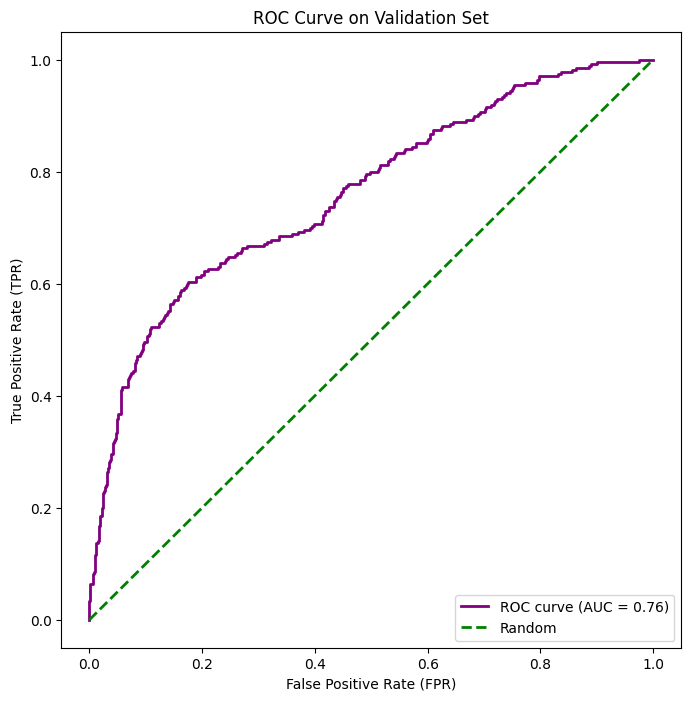

In [ ]:
# ROC and AUC for NN
y_val_prob_nn = best_model.predict_proba(X_val)[:,1]
fpr, tpr,_ = roc_curve(y_val[:,1], y_val_prob_nn)
roc_auc = auc(fpr,tpr)

plt.figure(figsize = (8, 8))
plt.plot(fpr, tpr, color = 'purple', lw = 2, label = 'ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color = 'green', lw = 2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve on Validation Set')
plt.legend(loc='lower right')
plt.show()

# Q10. Obtain predictions on validation set and print accuracy, precision, recall and F1 score.

In [ ]:
pred_val = best_model.predict(X_val)[:,1]

pred_val = (pred_val > 0.5).astype("int32")

# y_pred_labels = [item for sublist in enc_target.inverse_transform(y_pred_val) for item in sublist]
# y_val_labels = [item for sublist in enc_target.inverse_transform(y_val) for item in sublist]
#print(y_val_labels)
#print(y_pred_labels)
precision_val = precision_score(y_val[:,1],pred_val)
print(f"Precision val = {precision_val}")
recall_val = recall_score(y_val[:,1], pred_val)
print(f"Recall val = {recall_val}")
accuracy_val = accuracy(y_val[:,1],pred_val)
print(f"Accuracy val = {accuracy_val}")
print(f"Validation F1 = {f1_score(y_val[:,1],pred_val)}")

Validation val = 0.5879828326180258
Recall val = 0.5074074074074074
Accuracy val = 0.8085284280936454
Validation F1 = 0.5447316103379721


Do you get a better accuracy/recall/precision/F1 score than the first NN model you have built in exercise 5? Explain.

Ans- We can say that we have a better accuracy/precision and F1 for the second NN. This happened because we use a better set of hyperparameters found by RandomizedSearchCV()

### Logistic Regression and Random Forest
In a real world scenario, you can try a number of algorithms for the same problem. Let us work with the same default payment dataset to produce Logistic Regression and Random Forest models.

Q11. Implement a function logistic_regression_model that returns a logistic regression model with the best paprameters. You will use GridSearchCV to find the best parameters. The parameters search space is up to you. If there is any ConvergenceWarning, increase the number of iterations.

In [ ]:
from sklearn.linear_model import LogisticRegression
def logistic_regression_model(X_train, y_train):
    ### YOUR CODE HERE ###
    classifier = LogisticRegression(max_iter=350)
#     classifier.fit(X_train, y_train)
    solvers =  ['liblinear', 'saga']
    penalty = ['l1','l2']
    c_values = [100, 30,10,3, 1.0, 0.3,0.1, 0.03,0.01]
    grid = {'solver':solvers,'penalty':penalty,'C':c_values}
    grid_search = GridSearchCV(estimator=classifier, param_grid=grid, n_jobs=-1, cv=None, scoring='recall',error_score=0)
    grid_result = grid_search.fit(X_train, y_train)
    ######################
    return grid_result.best_estimator_ # Return a logistic model with the best parameters you found

Q12. Fit the model by training set, obtain predictions on validation set and compute accuracy, precision, recall and F1 score.

In [ ]:
# fit the model
# compute accuracy,precision,recall on validation set
### YOUR CODE HERE ###
model_logit = logistic_regression_model(X_train,y_train[:,1])
model_logit.fit(X_train,y_train[:,1])
y_pred = model_logit.predict(X_val)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
print(f"Validation Precision = {precision_score(y_val[:,1],y_pred)}")
print(f"Validation Recall = {recall_score(y_val[:,1],y_pred)}")
print(f"Validation Accuracy = {accuracy(y_val[:,1],y_pred)}")
print(f"Validation F1 = {f1_score(y_val[:,1],y_pred)}")

Validation Precision = 0.6216216216216216
Validation Recall = 0.42592592592592593
Validation Accuracy = 0.8118729096989966
Validation F1 = 0.5054945054945055


Q13. Plot the ROC curve by giving appropriate names for title and axes.

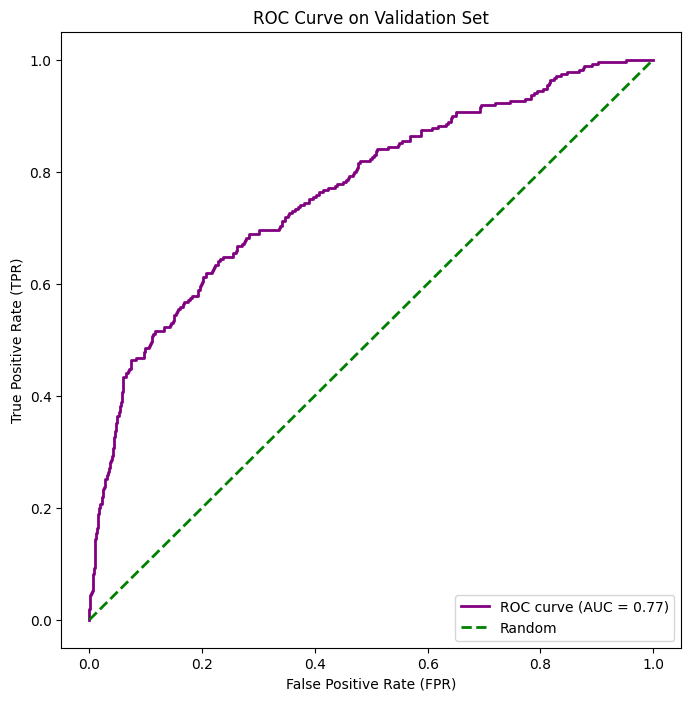

In [ ]:
### WRITE CODE HERE
from sklearn.metrics import roc_curve,auc
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

validation_probabilities = model_logit.predict_proba(X_val)[:, 1]

fpr, tpr,_ = roc_curve(y_val[:,1], validation_probabilities)
roc_auc = auc(fpr,tpr)

plt.figure(figsize = (8, 8))
plt.plot(fpr, tpr, color = 'purple', lw = 2, label = 'ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color = 'green', lw = 2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve on Validation Set')
plt.legend(loc='lower right')
plt.show()

Q14. Implement a function random_forest_model that returns a random forest model with the best paprameters. You will apply GridSearchCV to find the best parameters. The parameter search space is up to you. (Please set the random state of RandomForestClassifier to be 26.)

In [ ]:
def random_forest_model(X_train, y_train):
    ### YOUR CODE HERE ###
    classifier = RandomForestClassifier(random_state=26)
#   classifier.fit(X_train, y_train)
    param_grid = {
        'max_depth': [5, 10, 20, 30, None],
        'max_features': ['sqrt', 'log2'],
        'min_samples_leaf': [1, 2, 4, 8],
        'min_samples_split': [2, 5, 10,20],
        'n_estimators': [50, 100, 200, 300]
    }
    grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, n_jobs=-1, cv=None, scoring='recall')
    grid_result = grid_search.fit(X_train, y_train)

    return grid_result.best_estimator_# Return a logistic model with the best parameters you found and random_state=26

Q15. Fit the model by training set, obtain predictions on validation set and compute accuracy, precision, recall and F1 score.

In [ ]:
### WRITE CODE HERE
model_rf = random_forest_model(X_train,y_train[:,1])

In [ ]:
model_rf.fit(X_train,y_train[:,1])

In [ ]:
y_pred_rf = model_rf.predict(X_val)
print(f"Validation Precision = {precision_score(y_val[:,1],y_pred_rf)}")
print(f"Validation Recall = {recall_score(y_val[:,1],y_pred_rf)}")
print(f"Validation Accuracy = {accuracy(y_val[:,1],y_pred_rf)}")
print(f"Validation F1 = {f1_score(y_val[:,1],y_pred_rf)}")

Validation Precision = 0.6216216216216216
Validation Recall = 0.42592592592592593
Validation Accuracy = 0.8118729096989966
Validation F1 = 0.5054945054945055


Q16. Plot the ROC curve by giving appropriate names for title and axes.

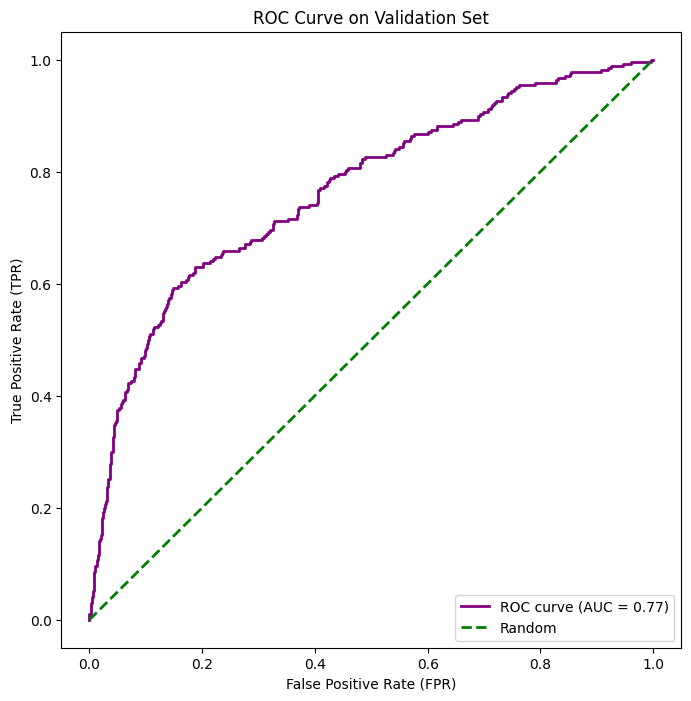

In [ ]:
from sklearn.metrics import roc_curve,auc
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

validation_probabilities = model_rf.predict_proba(X_val)[:, 1]

fpr, tpr,_ = roc_curve(y_val[:,1], validation_probabilities)
roc_auc = auc(fpr,tpr)

plt.figure(figsize = (8, 8))
plt.plot(fpr, tpr, color = 'purple', lw = 2, label = 'ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color = 'green', lw = 2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve on Validation Set')
plt.legend(loc='lower right')
plt.show()

Q17: Which of the above 3 models (NN, Logistic function and random forest) worked best for you? Explain in details the reason for good/bad performance for each of the models?

Ans- A good indicator to use is the ROC curve and therefore the AUC because it measures the overall performance of predicting default. We need to maximize the true positive rate while minimizing the false positive.

Also, we can look into the F1 score that takes both precision and recall to calculate the value. The F1 score is particularly valuable when there is a need to strike a balance between precision and recall. In our example, default prediction, false positives and false negatives have significant consequences. The F1 score helps in finding a compromise between these two types of errors.

On the other hand, while accuracy gives a general idea of performance, if we have an imbalanced dataset it can be missliding. Therefore, it is not a good choice to select our model based on accuracy. Accuracy doesn't capture the trade-off between sensitivity and specificity.

**Therefore, given that AUC is similar in all models but the F1 is clearly better in the second NN, we choose the second NN as our final model.**



Using the best of the above 3 models, obtain predictions for the test set.

In [ ]:
### YOUR CODE HERE ###
y_pred = best_model.predict(test_full)
y_pred

array([[1, 0],
       [1, 0],
       [0, 1],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]])